<a href="https://colab.research.google.com/github/Knighler/Puzzles-Image-Processing/blob/main/step2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:

from google.colab import drive
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt


drive.mount('/content/drive')

print("Drive mounted successfully.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Drive mounted successfully.


In [10]:

ROOT_PATH = "/content/drive/MyDrive/Step 1 Output"
SUBFOLDERS = ['puzzle2x2', 'puzzle4x4', 'puzzle8x8']
if os.path.exists(ROOT_PATH):
    print(f"Root path found: {ROOT_PATH}")
else:
    print(f"ERROR: Root path not found. Please check the ROOT_PATH variable.")

✅ Root path found: /content/drive/MyDrive/Step 1 Output


In [11]:

def enhance_method_lab(image):
    """Method A: LAB Color Space (Recommended/Robust)"""
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    l_enhanced = clahe.apply(l)
    merged = cv2.merge((l_enhanced, a, b))
    return cv2.cvtColor(merged, cv2.COLOR_LAB2BGR)

def enhance_method_hsv(image):
    """Method B: HSV Color Space (Preserves Hue)"""
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    v_enhanced = clahe.apply(v)
    merged = cv2.merge((h, s, v_enhanced))
    return cv2.cvtColor(merged, cv2.COLOR_HSV2BGR)

def enhance_method_ycrcb(image):
    """Method C: YCrCb Color Space (Video Standard)"""
    ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
    y, cr, cb = cv2.split(ycrcb)

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    y_enhanced = clahe.apply(y)
    merged = cv2.merge((y_enhanced, cr, cb))
    return cv2.cvtColor(merged, cv2.COLOR_YCrCb2BGR)

def pipeline_step2_enhance(image, method='LAB'):

    if image is None: return None


    if method == 'HSV':
        contrast_img = enhance_method_hsv(image)
    elif method == 'YCrCb':
        contrast_img = enhance_method_ycrcb(image)
    else:

        contrast_img = enhance_method_lab(image)

    gaussian = cv2.GaussianBlur(contrast_img, (0, 0), 2.0)
    sharp_img = cv2.addWeighted(contrast_img, 1.5, gaussian, -0.5, 0)

    return sharp_img

In [14]:

def process_and_save_step2(root_path, subfolders):

    output_root = os.path.join(root_path, "step2_enhanced_output")
    if not os.path.exists(output_root):
        os.makedirs(output_root)
        print(f"📁 Created output folder: {output_root}")

    processed_count = 0

    for folder in subfolders:
        input_path = os.path.join(root_path, folder)
        save_path = os.path.join(output_root, folder)


        if not os.path.exists(input_path):
            print(f"⚠️ Skipping {folder} (Folder not found)")
            continue

        if not os.path.exists(save_path):
            os.makedirs(save_path)

        print(f"\n--- Processing {folder} ---")

        files = [f for f in os.listdir(input_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

        if not files:
            print("No images found.")
            continue


        for filename in files:
            img_full_path = os.path.join(input_path, filename)
            denoised_input = cv2.imread(img_full_path)

            if denoised_input is None:
                print(f"Error reading {filename}")
                continue

            enhanced_result = pipeline_step2_enhance(denoised_input, method='LAB')
            save_filename = f"enhanced_{filename}"
            cv2.imwrite(os.path.join(save_path, save_filename), enhanced_result)

            processed_count += 1

        print(f" Finished {folder} - Saved to 'step2_enhanced_output/{folder}'")

    if processed_count == 0:
        print("\ No images processed. Please check your ROOT_PATH.")
    else:
        print(f"\n🎉 Complete! Processed {processed_count} images.")


process_and_save_step2(ROOT_PATH, SUBFOLDERS)

📁 Created output folder: /content/drive/MyDrive/Step 1 Output/step2_enhanced_output

--- Processing puzzle2x2 ---
✅ Finished puzzle2x2 - Saved to 'step2_enhanced_output/puzzle2x2'

--- Processing puzzle4x4 ---
✅ Finished puzzle4x4 - Saved to 'step2_enhanced_output/puzzle4x4'

--- Processing puzzle8x8 ---
✅ Finished puzzle8x8 - Saved to 'step2_enhanced_output/puzzle8x8'

🎉 Complete! Processed 330 images.


🔍 Starting Comparison on images from: /content/drive/MyDrive/Step 1 Output


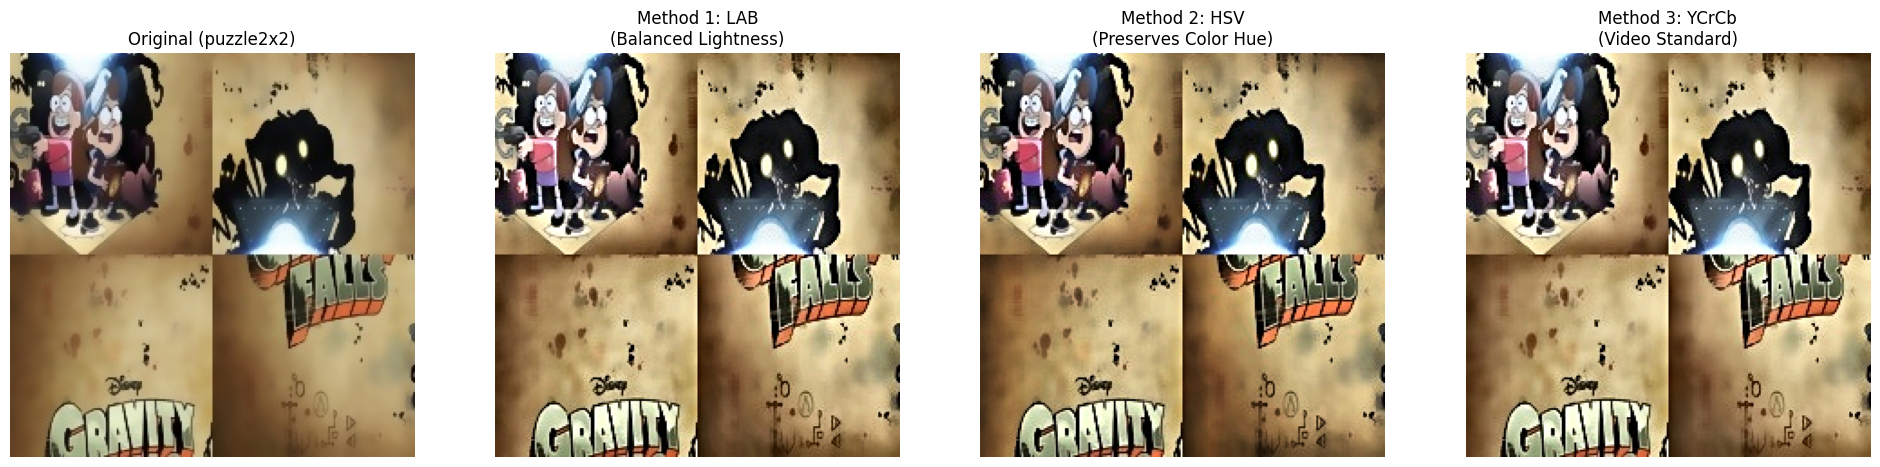

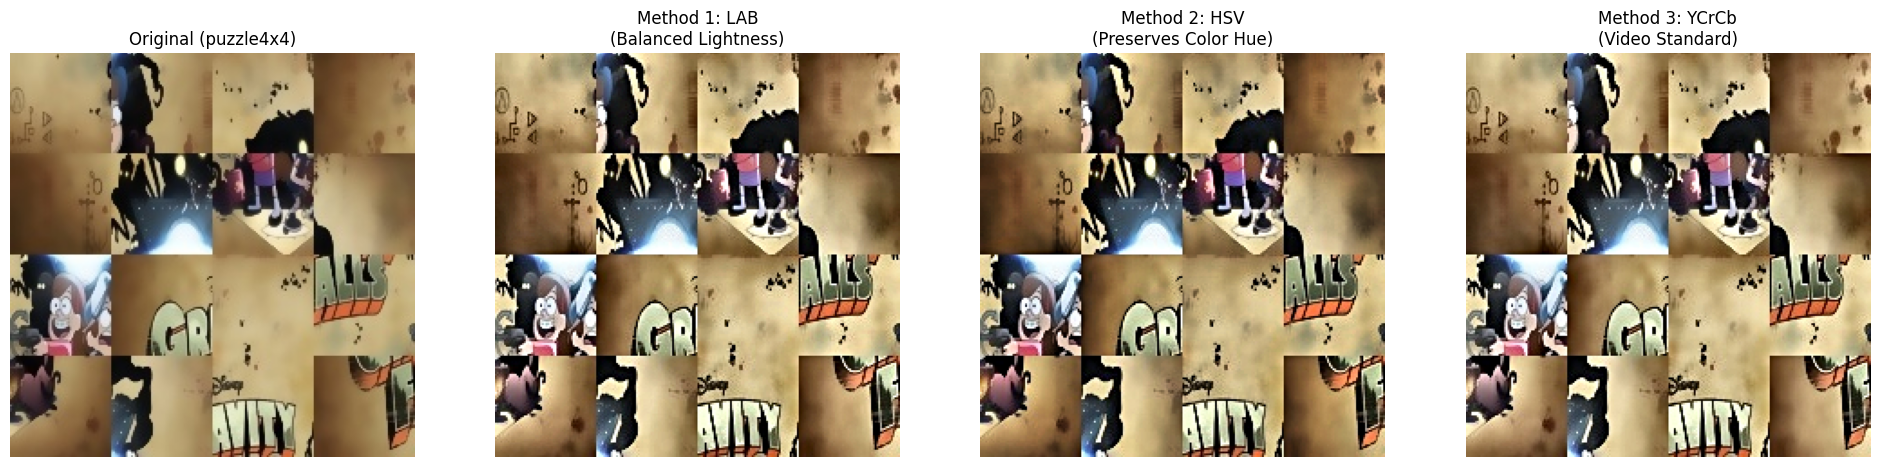

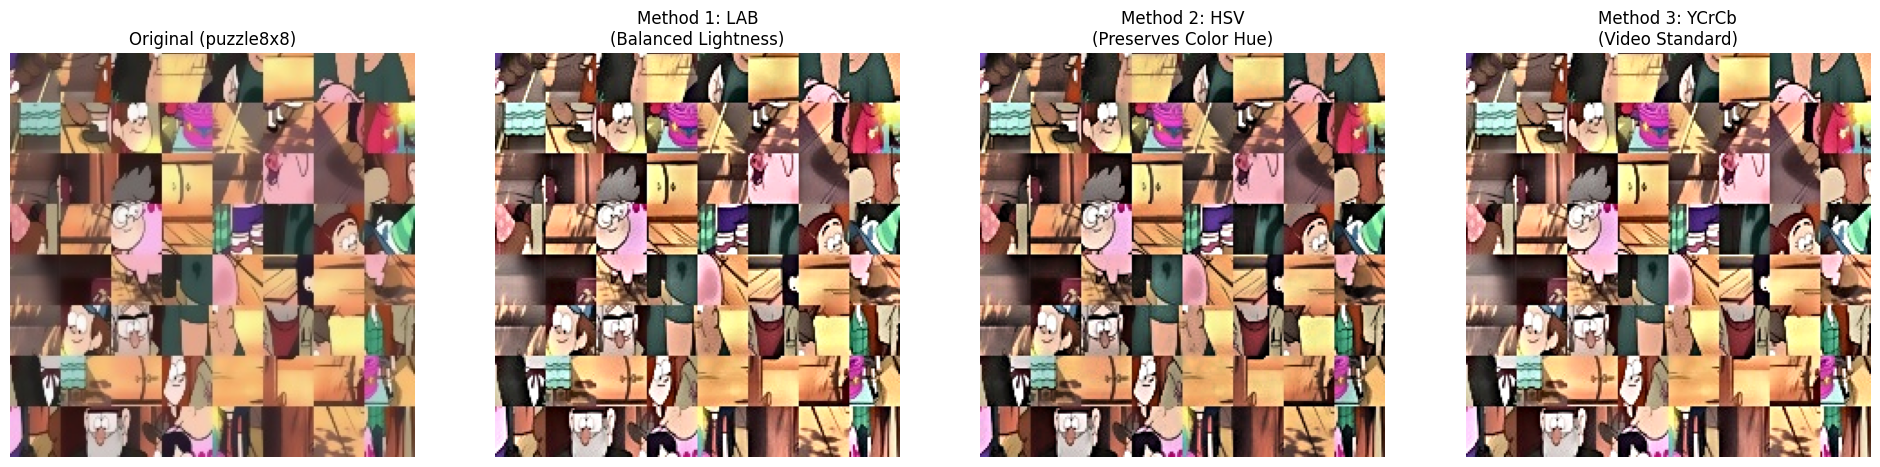

In [13]:

def enhance_method_lab(image):
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    l_enhanced = clahe.apply(l)
    merged = cv2.merge((l_enhanced, a, b))
    return cv2.cvtColor(merged, cv2.COLOR_LAB2BGR)

def enhance_method_hsv(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    v_enhanced = clahe.apply(v)
    merged = cv2.merge((h, s, v_enhanced))
    return cv2.cvtColor(merged, cv2.COLOR_HSV2BGR)

def enhance_method_ycrcb(image):
    ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
    y, cr, cb = cv2.split(ycrcb)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    y_enhanced = clahe.apply(y)
    merged = cv2.merge((y_enhanced, cr, cb))
    return cv2.cvtColor(merged, cv2.COLOR_YCrCb2BGR)

def apply_sharpening(image):
    """Applies Unsharp Masking to any enhanced image"""
    gaussian = cv2.GaussianBlur(image, (0, 0), 2.0)
    return cv2.addWeighted(image, 1.5, gaussian, -0.5, 0)

def run_comparison_demo(root_path, subfolders):
    print(f"🔍 Starting Comparison on images from: {root_path}")

    for folder in subfolders:
        folder_path = os.path.join(root_path, folder)
        if not os.path.exists(folder_path):
            continue

        files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg'))]
        if not files: continue

        filename = files[0]
        img_path = os.path.join(folder_path, filename)
        original = cv2.imread(img_path)

        if original is None: continue


        res_lab = apply_sharpening(enhance_method_lab(original))
        res_hsv = apply_sharpening(enhance_method_hsv(original))
        res_ycrcb = apply_sharpening(enhance_method_ycrcb(original))
        plt.figure(figsize=(24, 6))
        plt.subplot(1, 4, 1)
        plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
        plt.title(f"Original ({folder})")
        plt.axis('off')


        plt.subplot(1, 4, 2)
        plt.imshow(cv2.cvtColor(res_lab, cv2.COLOR_BGR2RGB))
        plt.title("Method 1: LAB\n(Balanced Lightness)")
        plt.axis('off')


        plt.subplot(1, 4, 3)
        plt.imshow(cv2.cvtColor(res_hsv, cv2.COLOR_BGR2RGB))
        plt.title("Method 2: HSV\n(Preserves Color Hue)")
        plt.axis('off')


        plt.subplot(1, 4, 4)
        plt.imshow(cv2.cvtColor(res_ycrcb, cv2.COLOR_BGR2RGB))
        plt.title("Method 3: YCrCb\n(Video Standard)")
        plt.axis('off')

        plt.show()


if 'ROOT_PATH' not in globals():
    ROOT_PATH = "/content/drive/MyDrive/ProjectData" # Default fallback
    SUBFOLDERS = ['puzzle2x2', 'puzzle4x4', 'puzzle8x8']

run_comparison_demo(ROOT_PATH, SUBFOLDERS)


Processing Folder: puzzle2x2


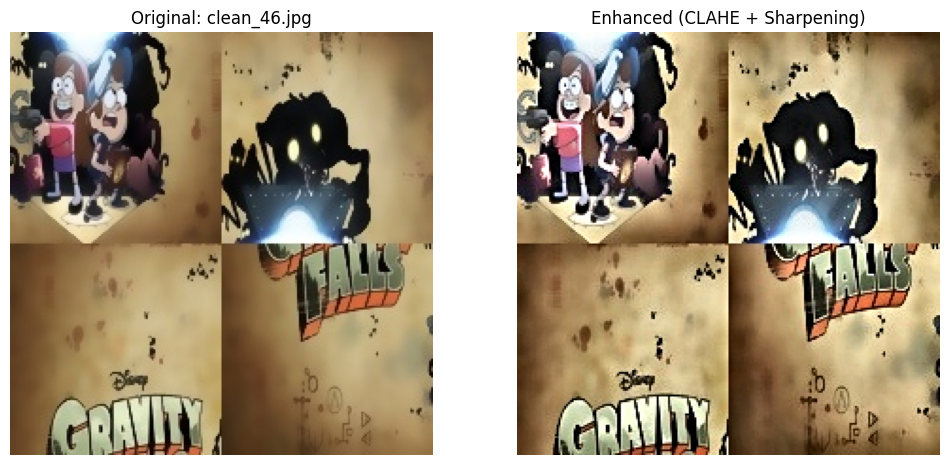

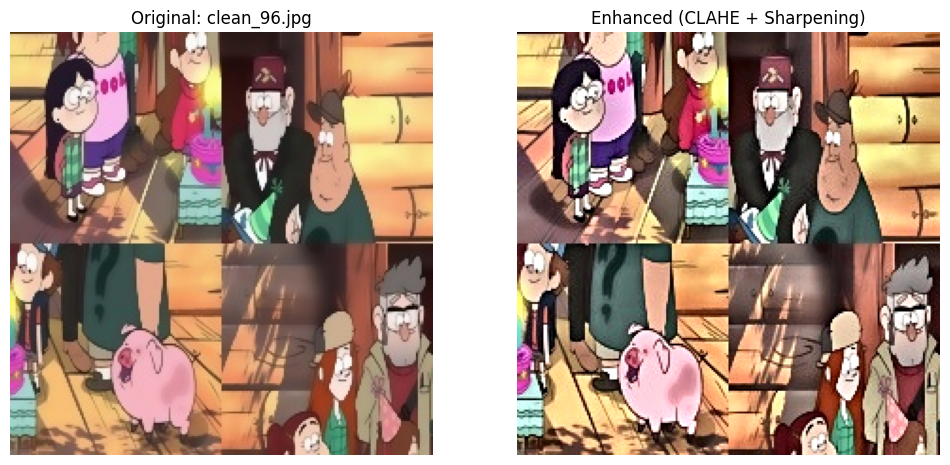


Processing Folder: puzzle4x4


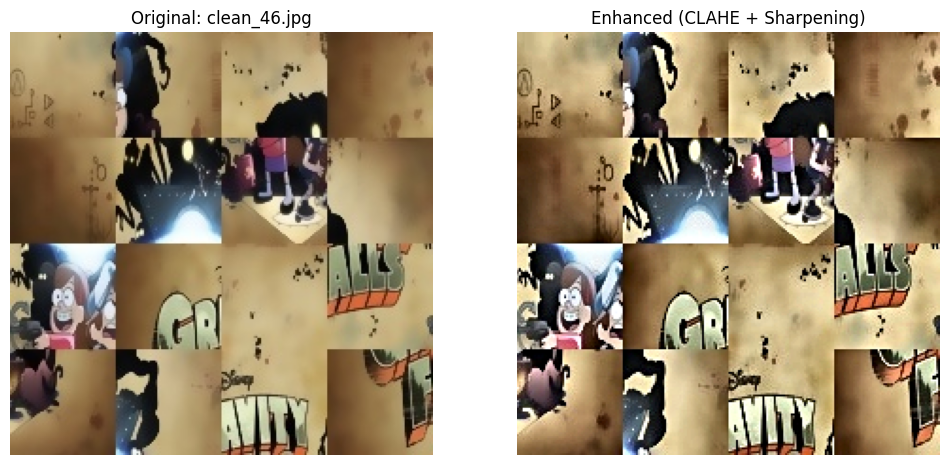

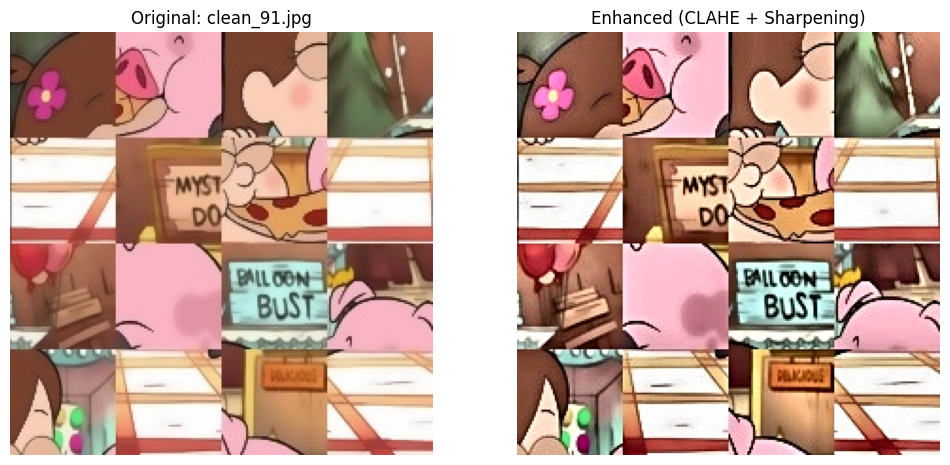


Processing Folder: puzzle8x8


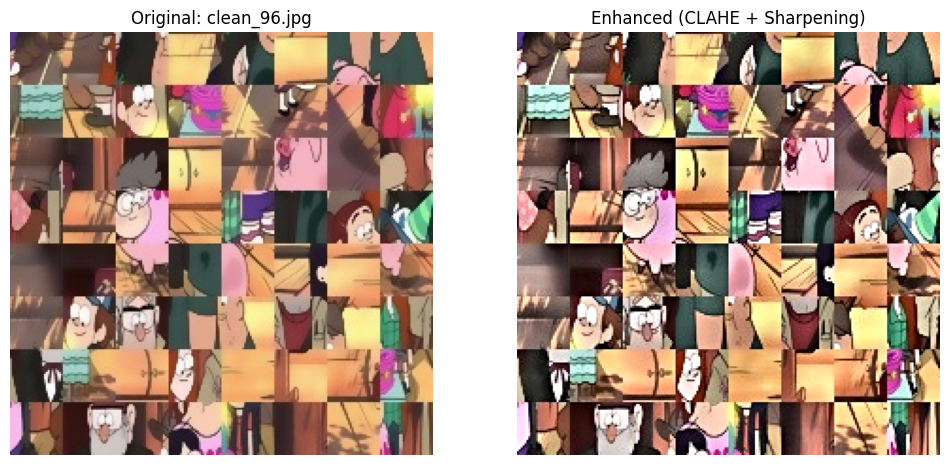

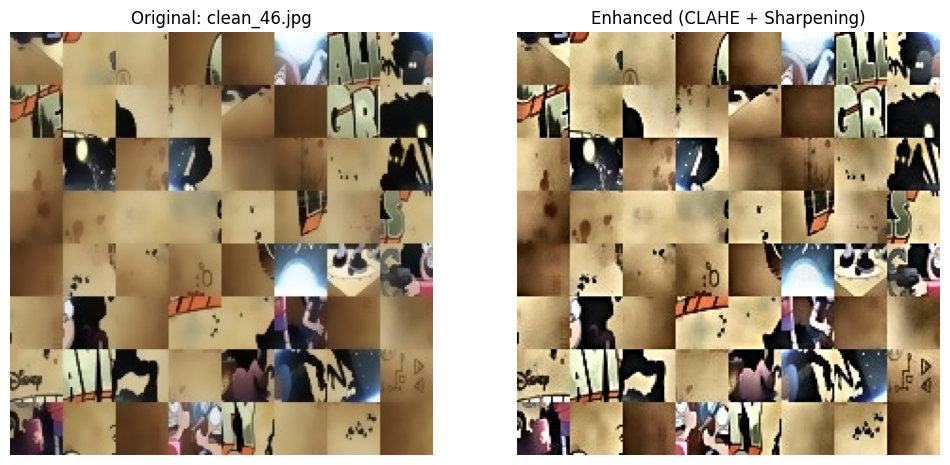